In [178]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [179]:
query = "select * from customers limit 4"

In [180]:
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [181]:
query = "show tables"
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [182]:
query = "select * from salesdata limit 4"
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00


In [183]:
query = """select sd.customerid , c.firstname , sd.saledate , sd.totalprice
        from customers as c
        join salesdata as sd    
        on c.customerid = sd.customerid
        limit 5"""

In [184]:
read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [185]:
query = """
select t.customerid , c.firstname , t.expenditure 
from  
(select customerid ,
sum(totalprice) as expenditure
        from salesdata 
        group by customerid) as t
join customers as c
on t.customerid = c.customerid
limit 10;"""

In [186]:
top_10_annual_customers = read_query(query)

In [187]:
top_10_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [188]:
top_10_annual_customers["expenditure"].dtype

dtype('O')

In [189]:
top_10_annual_customers["expenditure"].values

array([Decimal('9933032.00'), Decimal('9779316.00'),
       Decimal('9889393.00'), Decimal('9168084.00'),
       Decimal('10315608.00'), Decimal('6676018.00'),
       Decimal('9002667.00'), Decimal('9416623.00'),
       Decimal('9290207.00'), Decimal('6842296.00')], dtype=object)

In [190]:
top_10_annual_customers["expenditure"] = top_10_annual_customers["expenditure"].astype(float)

In [191]:
top_10_annual_customers["expenditure"].dtype

dtype('float64')

In [192]:
expenditure1 = top_10_annual_customers["expenditure"].values

In [193]:
customer_names =top_10_annual_customers["firstname"].values

In [194]:
cmap_values = np.linspace(0.3,1,10)

In [195]:
cmap = plt.cm.PuBuGn(cmap_values)

<h1 style = "color : Black">Plot a graph which indicates the top 10 annual customers - 

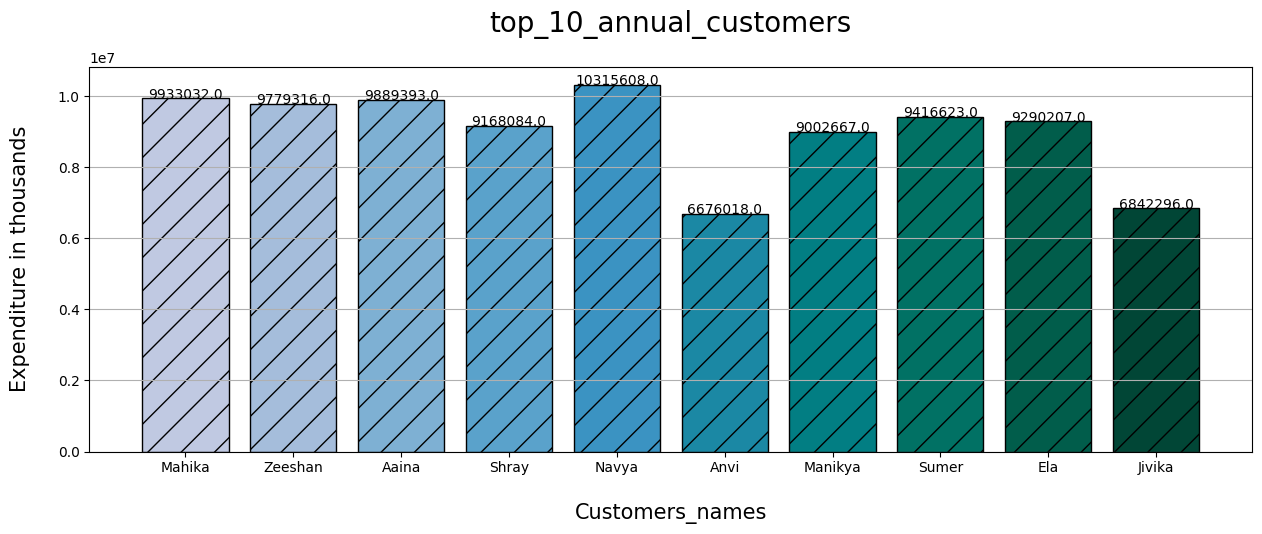

In [196]:
plt.figure(figsize =(15,5))

plt.bar( x = customer_names , height = expenditure1 , color = cmap , edgecolor = "black", hatch = "/")
for i in range(len(customer_names)):
    plt.annotate(text = f'{expenditure1[i]}' , xy = (i,expenditure1[i]+5) , horizontalalignment = "center")
plt.grid(axis = "y")


plt.title("top_10_annual_customers" , pad = 25 , size = 20)
plt.xlabel("Customers_names", labelpad = 20 , size = 15)
plt.ylabel("Expenditure in thousands" , labelpad = 20 , size = 15)

plt.savefig("top_10_annual_customers.jpeg")

In [197]:
query = """ show tables"""
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [198]:
query =""" select * from salesdata limit 5"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


<h1 style = "color : Black">Total sales done by each employee in the month of January

In [199]:
query = """ select monthname(s.SaleDate) as monthname ,
 e.firstname , sum(s.totalprice) as total_Sale_in_january
from salesdata as s
join employees as e
on s.employeeid = e.employeeid
where monthname(s.SaleDate) = "January"
group by monthname(s.SaleDate) , e.firstname
order by total_Sale_in_january desc;
"""

df = read_query(query= query)

In [200]:
df

,monthname,firstname,total_Sale_in_january
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
...,...,...,...
86,January,Onkar,518140.00
87,January,Jiya,514921.00
88,January,Emir,393907.00
89,January,Keya,204104.00


<h1 style = "color : Black"> Plot the graph of top 10 employees who did most sales in January

In [201]:
df = df.iloc[:10 ,:]

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   monthname              10 non-null     object
 1   firstname              10 non-null     object
 2   total_Sale_in_january  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [203]:
df["total_Sale_in_january"] = df["total_Sale_in_january"].astype(float)

C:\Users\anika\AppData\Local\Temp\ipykernel_12956\105614164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_Sale_in_january"] = df["total_Sale_in_january"].astype(float)


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthname              10 non-null     object 
 1   firstname              10 non-null     object 
 2   total_Sale_in_january  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [205]:
name_of_employees = df["firstname"].values

total_sale = df["total_Sale_in_january"].values

In [206]:
cm_values = np.linspace(0.3,1,10)
cm = plt.cm.Spectral(cm_values)

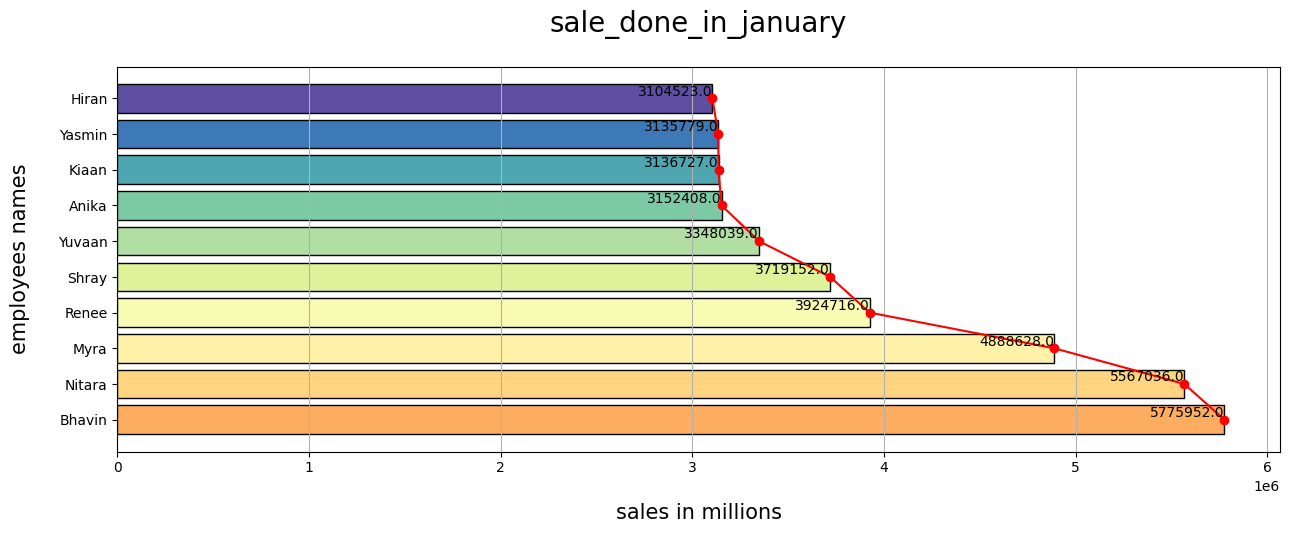

In [207]:
plt.figure(figsize =(15,5))

plt.plot(total_sale,name_of_employees , marker = "o" , color = "red")
plt.barh(y = name_of_employees , width = total_sale, color = cm , edgecolor = "black")
for i in range(len(total_sale)):
    plt.annotate(text = total_sale[i] , xy = (total_sale[i] , i) , horizontalalignment = "right",
                  verticalalignment = "bottom")


plt.title("sale_done_in_january" , pad = 25  , size = 20)
plt.xlabel("sales in millions" , labelpad = 20 , size = 15)
plt.ylabel("employees names", labelpad = 20 , size = 15)

plt.grid(axis = "x")



In [208]:
query = """ select t.month_name , t.monthlysales
from
(select month(saledate) as month_number ,
monthname(saledate) as month_name,
 sum(totalprice) as monthlysales
from salesdata
group by month(saledate) , monthname(saledate)
order by month(saledate)) as t;"""

df = read_query(query)

In [209]:
df

,month_name,monthlysales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [210]:
type(df)

pandas.core.frame.DataFrame

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month_name    12 non-null     object
 1   monthlysales  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [212]:
monthname = df["month_name"].values
df["monthlysales"] = df["monthlysales"].astype(float)
monthlysales = df["monthlysales"].values

In [213]:
avgsales = df["monthlysales"].mean()
print(avgsales)

149106174.0


In [214]:
# goalline - it is the profit we should have to cover all the expenses:
goal_line = avgsales*1.05


<h1 style = "color : Black">Provide a visual representation of our annual sales performance over time

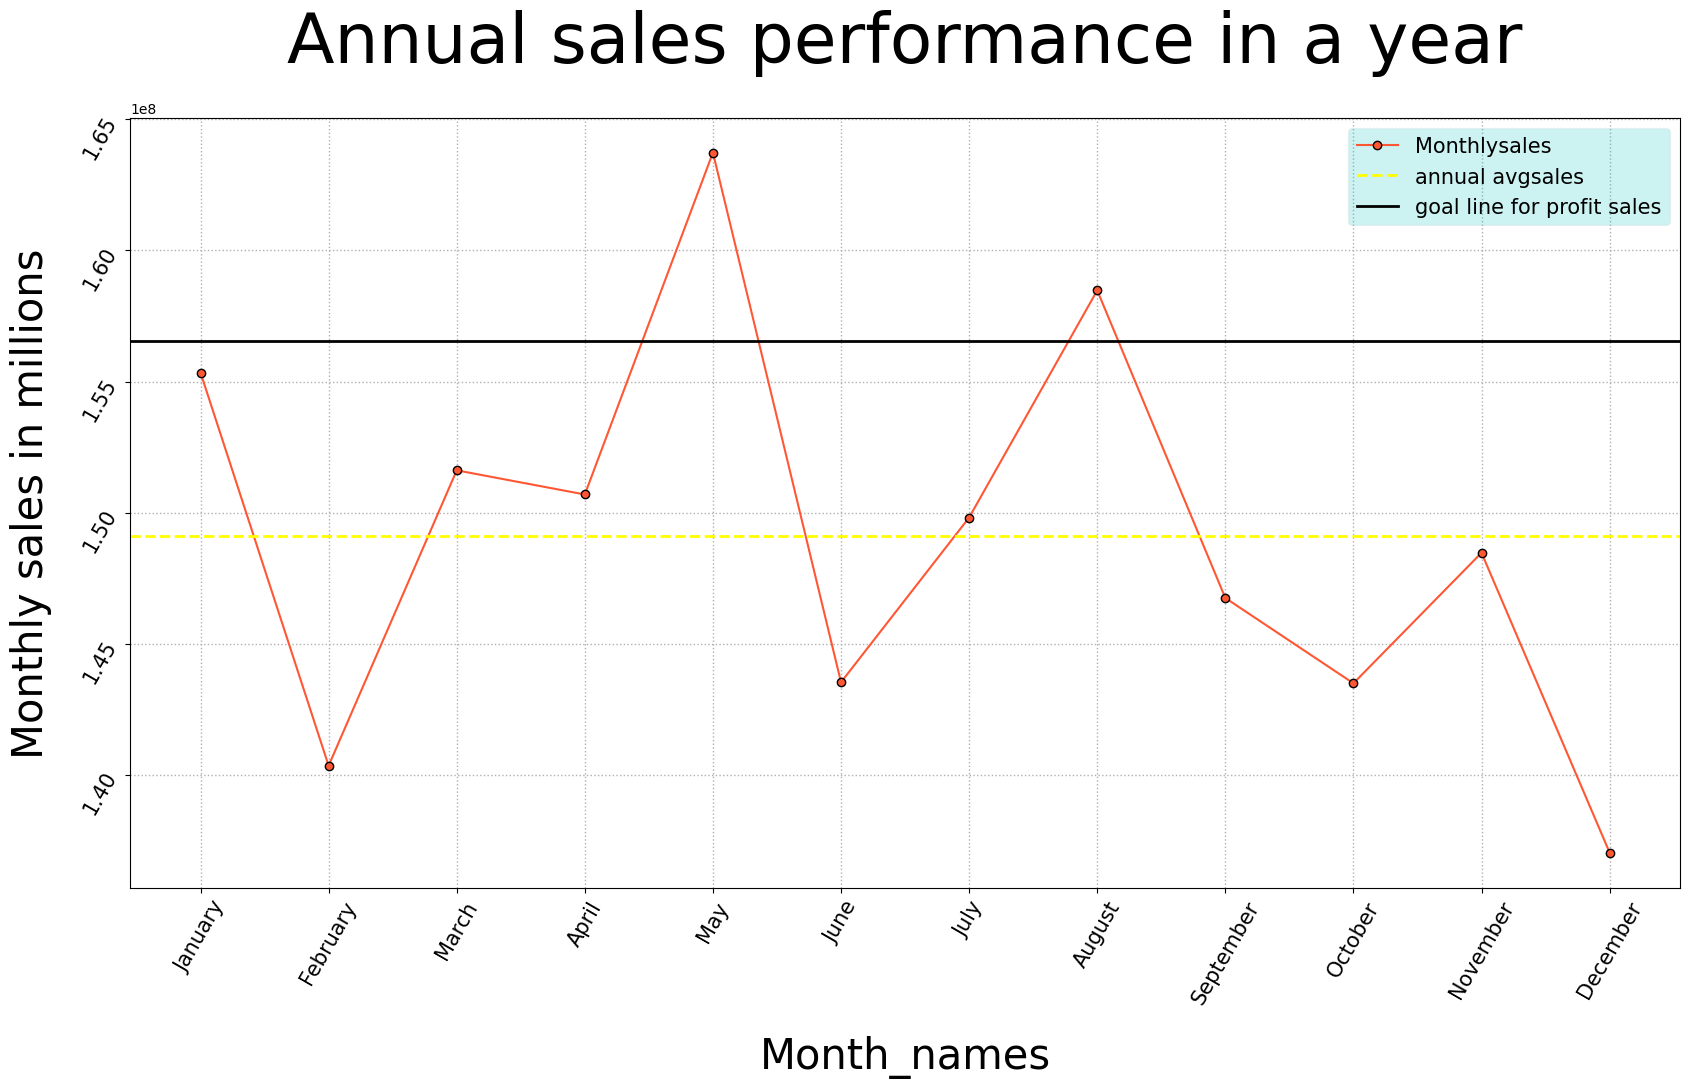

In [215]:
plt.figure(figsize =(20,10))

plt.plot(monthname , monthlysales, marker = "o" , color = "#FF5733" , markeredgecolor = "black" , label = "Monthlysales")



plt.axhline(y = avgsales ,linestyle='dashed',c='yellow',lw=2,ms=15 , label = "annual avgsales")
plt.axhline(y = goal_line ,linestyle='-',c='black',lw=2,ms=15 , label = "goal line for profit sales")
plt.title("Annual sales performance in a year" , pad = 40 , size = 50)

plt.xlabel("Month_names" , labelpad = 20, size = 30 )
plt.ylabel("Monthly sales in millions" , labelpad = 20 , size = 30 )

plt.xticks(size = 15 ,rotation = 60)
plt.yticks(size = 15 ,rotation = 60)

plt.legend(bbox_to_anchor=(1,1),fontsize=15,facecolor='c',framealpha=0.2,fancybox=True)
plt.grid(axis='both',ls='dotted',lw=1)

<h1 style = "color = "black">Growth rate of sale on month by month basis and Plot the graph

In [216]:
query = """
select t.monthlyname , t.monthlysales ,
lag(t.monthlysales) over() as previousmonthslagg,
((t.monthlysales) - (lag(t.monthlysales) over())) / (lag(t.monthlysales) over()) * 100 as growth_rate
from
(select month(saledate) , monthname(saledate) as monthlyname,
sum(totalprice) as monthlysales 
from salesdata
group by month(saledate) , monthname(saledate)
order by month(saledate)) as t;"""

df = read_query(query)

In [217]:
df.head(5)


,monthlyname,monthlysales,previousmonthslagg,growth_rate
0,January,155340130.00,None,None
1,February,140345189.00,155340130.00,-9.652973
2,March,151612551.00,140345189.00,8.028321
3,April,150691604.00,151612551.00,-0.607435
4,May,163734120.00,150691604.00,8.655105


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   monthlyname         12 non-null     object
 1   monthlysales        12 non-null     object
 2   previousmonthslagg  11 non-null     object
 3   growth_rate         11 non-null     object
dtypes: object(4)
memory usage: 516.0+ bytes


In [219]:
monthname = df["monthlyname"].values
monthsales = df["monthlysales"].astype(float).values
growthrate = df["growth_rate"].astype(float).values


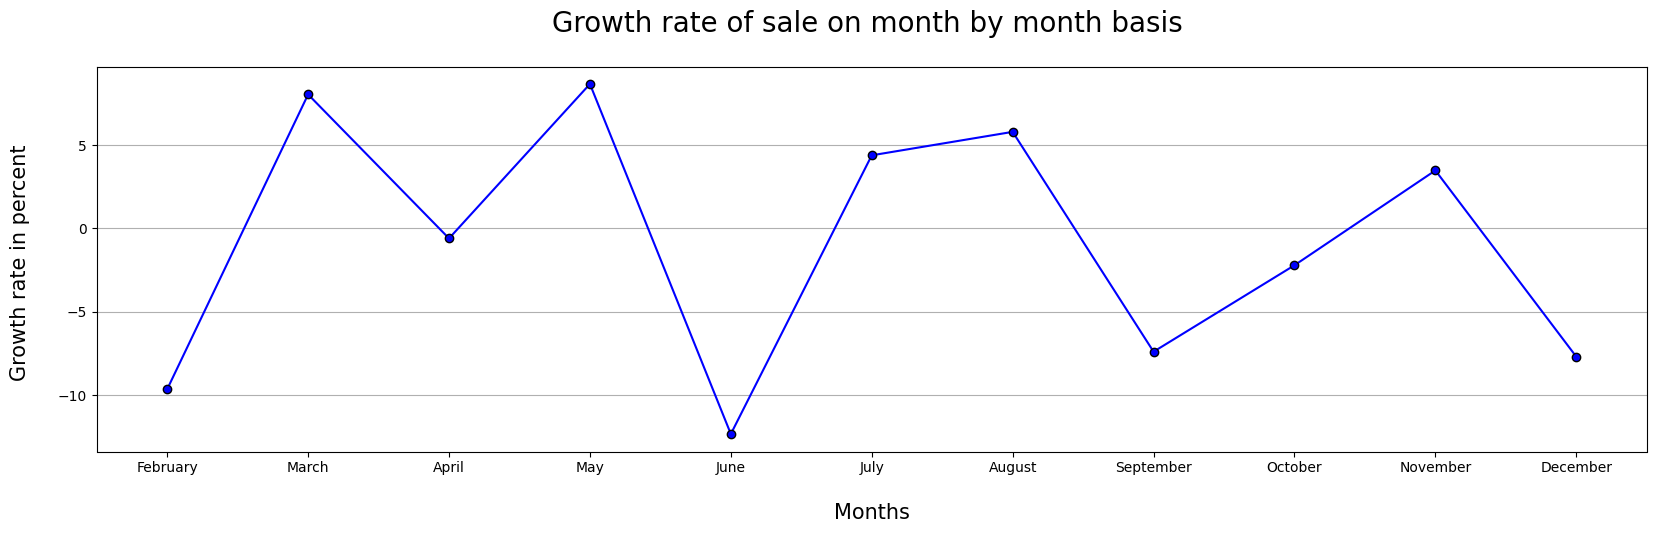

In [220]:
plt.figure(figsize =(20,5))

plt.plot(monthname , growthrate , marker = "o" , color = "#0000FF" , markeredgecolor = "black" )

plt.title("Growth rate of sale on month by month basis ", pad = 25, size = 20)
plt.xlabel("Months" , labelpad = 20 , size = 15)
plt.ylabel("Growth rate in percent " , labelpad = 20 , size = 15 )

plt.grid(axis = "y")

<h1 style="color : black"> total sales made by each employee

In [221]:
query = """  select EmployeeID , sum(totalprice) as Employeesales
from salesdata
group by EmployeeID
order by EmployeeID;"""

read_query(query)

,EmployeeID,Employeesales
0,1001,18231579.00
1,1002,18042772.00
2,1003,16151819.00
3,1004,13648670.00
4,1005,11565845.00
...,...,...
115,1116,17333826.00
116,1117,15910570.00
117,1118,12613265.00
118,1119,16623169.00


In [222]:
query = """ select sd.EmployeeID , concat(e.firstname, " " ,e.lastname) as FullName  , e.email , e.Department , sum(sd.totalprice) as Employeesale
from salesdata as sd
join employees as e
on sd.employeeid = e.employeeid
group by sd.EmployeeID 
order by sum(sd.totalprice) desc;"""

df = read_query(query)

<h1 style = "color = Black">the top 10 performing sales representatives based on their total sales volume

In [223]:
df

,EmployeeID,FullName,email,Department,Employeesale
0,1115,Yuvaan Sidhu,fname.lname@swiftm.org,Sales,20895341.00
1,1017,Tiya Hari,fname.lname@swiftm.org,Sales,19035834.00
2,1029,Shaan Bhagat,fname.lname@swiftm.org,Marketing,18649467.00
3,1074,Stuvan Sekhon,fname.lname@swiftm.org,ML Engineer,18333919.00
4,1001,Fateh Roy,fname.lname@swiftm.org,Marketing,18231579.00
...,...,...,...,...,...
115,1005,Keya Dixit,fname.lname@swiftm.org,Logistics,11565845.00
116,1019,Nitara Ghosh,fname.lname@swiftm.org,Logistics,11412116.00
117,1015,Heer Kumar,fname.lname@swiftm.org,Accounts,11399241.00
118,1072,Kimaya Tata,fname.lname@swiftm.org,Accounts,10898982.00


In [224]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EmployeeID    120 non-null    int64 
 1   FullName      120 non-null    object
 2   email         120 non-null    object
 3   Department    120 non-null    object
 4   Employeesale  120 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.8+ KB


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   EmployeeID    120 non-null    int64 
 1   FullName      120 non-null    object
 2   email         120 non-null    object
 3   Department    120 non-null    object
 4   Employeesale  120 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.8+ KB


In [226]:
Empname = np.array(df["FullName"].iloc[:10])
Empsales = np.array(df["Employeesale"].iloc[:10])
Empid = np.array(df["EmployeeID"].iloc[:10])


In [227]:
avg_mean_sales = df["Employeesale"].mean()
print(avg_mean_sales)

14910617.4


In [228]:
cmap_values = np.linspace(0.3,1,10)
cmap = plt.cm.Oranges_r(cmap_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


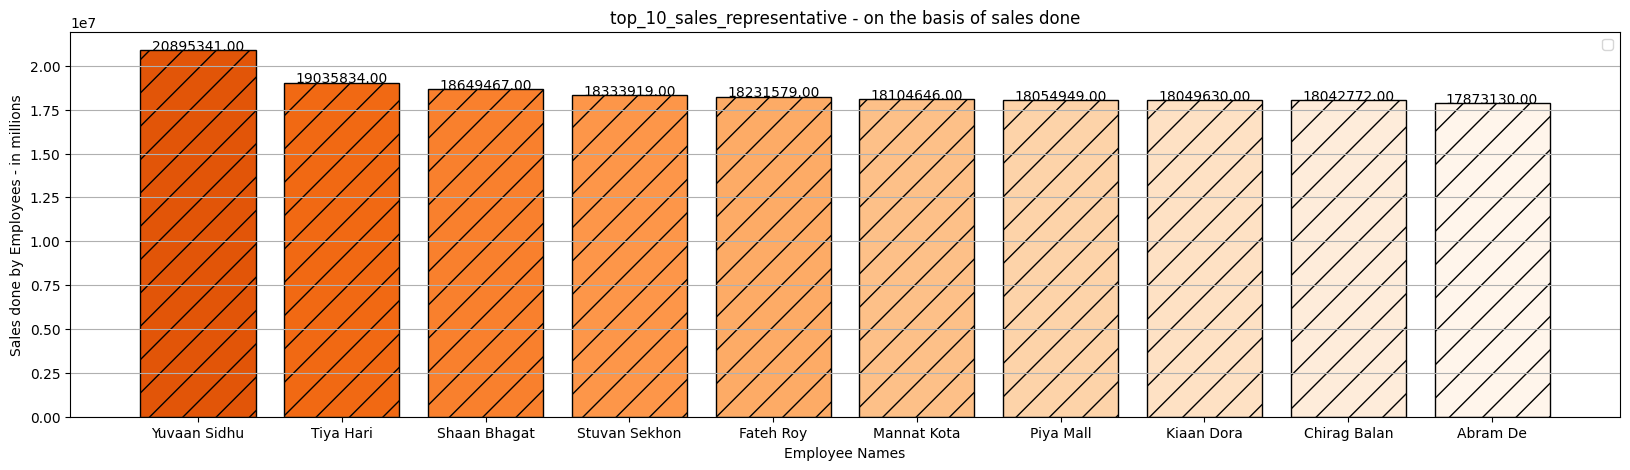

In [229]:
plt.figure(figsize =(20,5))

plt.bar(x = Empname , height = Empsales , color = cmap , edgecolor = "black" , hatch = "/")
for i in range(len(Empname)):
    plt.annotate(text = f'{Empsales[i]}' , xy = (i,Empsales[i]+5) , horizontalalignment = "center") 



plt.title("top_10_sales_representative - on the basis of sales done")
plt.xlabel("Employee Names")
plt.ylabel("Sales done by Employees - in millions")

plt.grid(axis="y")
plt.legend()
plt.show()

<h1 style = "color = "black>Contribution of diffeent Categories in sales and plot the graph

In [230]:
query = """ select  c.CategoryName as Category_name , sum(sd.totalprice) as Individual_category_sales
from salesdata as sd
join subcategories as sc
on sc.SubcatID = sd.SubcatID
join  categories as c
on c.CategoryID = sc.CategoryID
group by c.CategoryName
order by Individual_category_sales desc;"""

df = read_query(query)


In [231]:
df

,Category_name,Individual_category_sales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Category_name              6 non-null      object
 1   Individual_category_sales  6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes


In [233]:
category_names = df["Category_name"].values
df["Individual_category_sales"] = df["Individual_category_sales"].astype(float)
category_sales = df["Individual_category_sales"].values

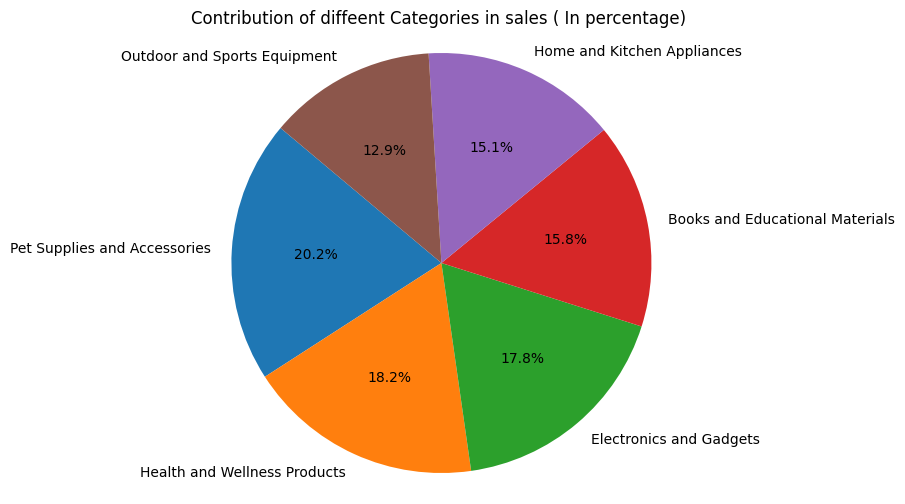

In [234]:
plt.figure(figsize=(10, 6))

plt.pie(category_sales, labels=category_names, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of diffeent Categories in sales ( In percentage) ')

plt.axis('equal') 
plt.show()

<h1 style = "color = black">How many customers are there in each state?

In [235]:
query = """select state , count(CustomerID) as total_customers
from customers 
group by state
order by total_customers desc;"""

df = read_query(query)

In [236]:
df

,state,total_customers
0,Manipur,14
1,Goa,14
2,Bihar,14
3,Nagaland,11
4,Himachal Pradesh,11
5,Arunachal Pradesh,11
6,Karnataka,11
7,Assam,10
8,Tripura,10
9,Chhattisgarh,10


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            21 non-null     object
 1   total_customers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [238]:
statenames = df["state"].values
counts = df["total_customers"].astype(int).values

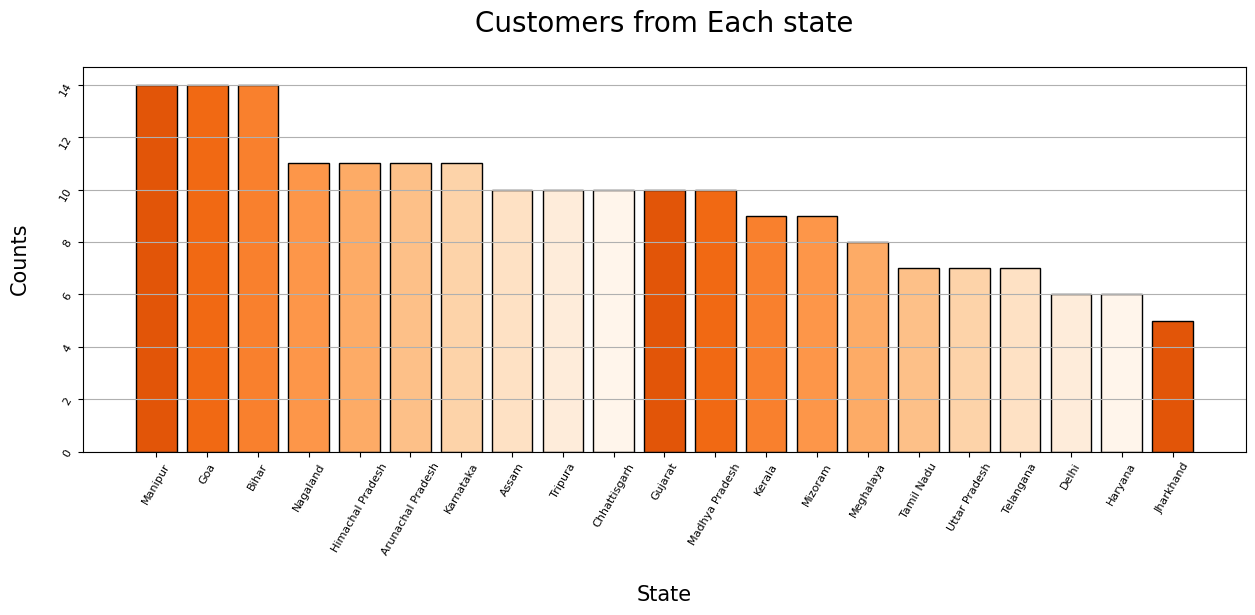

In [239]:
plt.figure(figsize =(15,5))

plt.bar( x = statenames , height = counts, color = cmap , edgecolor = "black")

plt.title("Customers from Each state" , pad = 25, size = 20)
plt.xlabel("State" , labelpad = 20, size = 15)
plt.ylabel("Counts", labelpad = 20, size = 15)


plt.xticks(size = 8 ,rotation = 60)
plt.yticks(size = 8 ,rotation = 60)

plt.grid(axis = "y")

<h1 style = "color = black"> What is the average quantity of each product sold?

In [240]:
query = """ select sub.SubcatName as Product_Name , count(sd.quantity) as number_of_products_sold , avg(sd.quantity) AS average_quantity_sold 
from salesdata as sd
join subcategories as sub
on  sd.SubcatID = sub.SubcatID
group by sub.SubcatName
order by number_of_products_sold desc;"""

df = read_query(query)

In [241]:
df

,Product_Name,number_of_products_sold,average_quantity_sold
0,Portable power banks,462,3.0974
1,Non-fiction books,437,2.9405
2,Bicycle,427,3.0703
3,Children's books,424,2.9953
4,Pet beds,417,3.0504
5,Laptops,414,3.0821
6,Camping stove,412,2.9320
7,Camping tent,411,3.1071
8,Fiction novels,408,3.0637
9,Running shoes,407,3.0344


In [242]:
productname = df["Product_Name"].values

quantityaverage = df["average_quantity_sold"].astype(float).values

In [243]:
mean_avg_of_quantity_sold =  quantityaverage.mean()

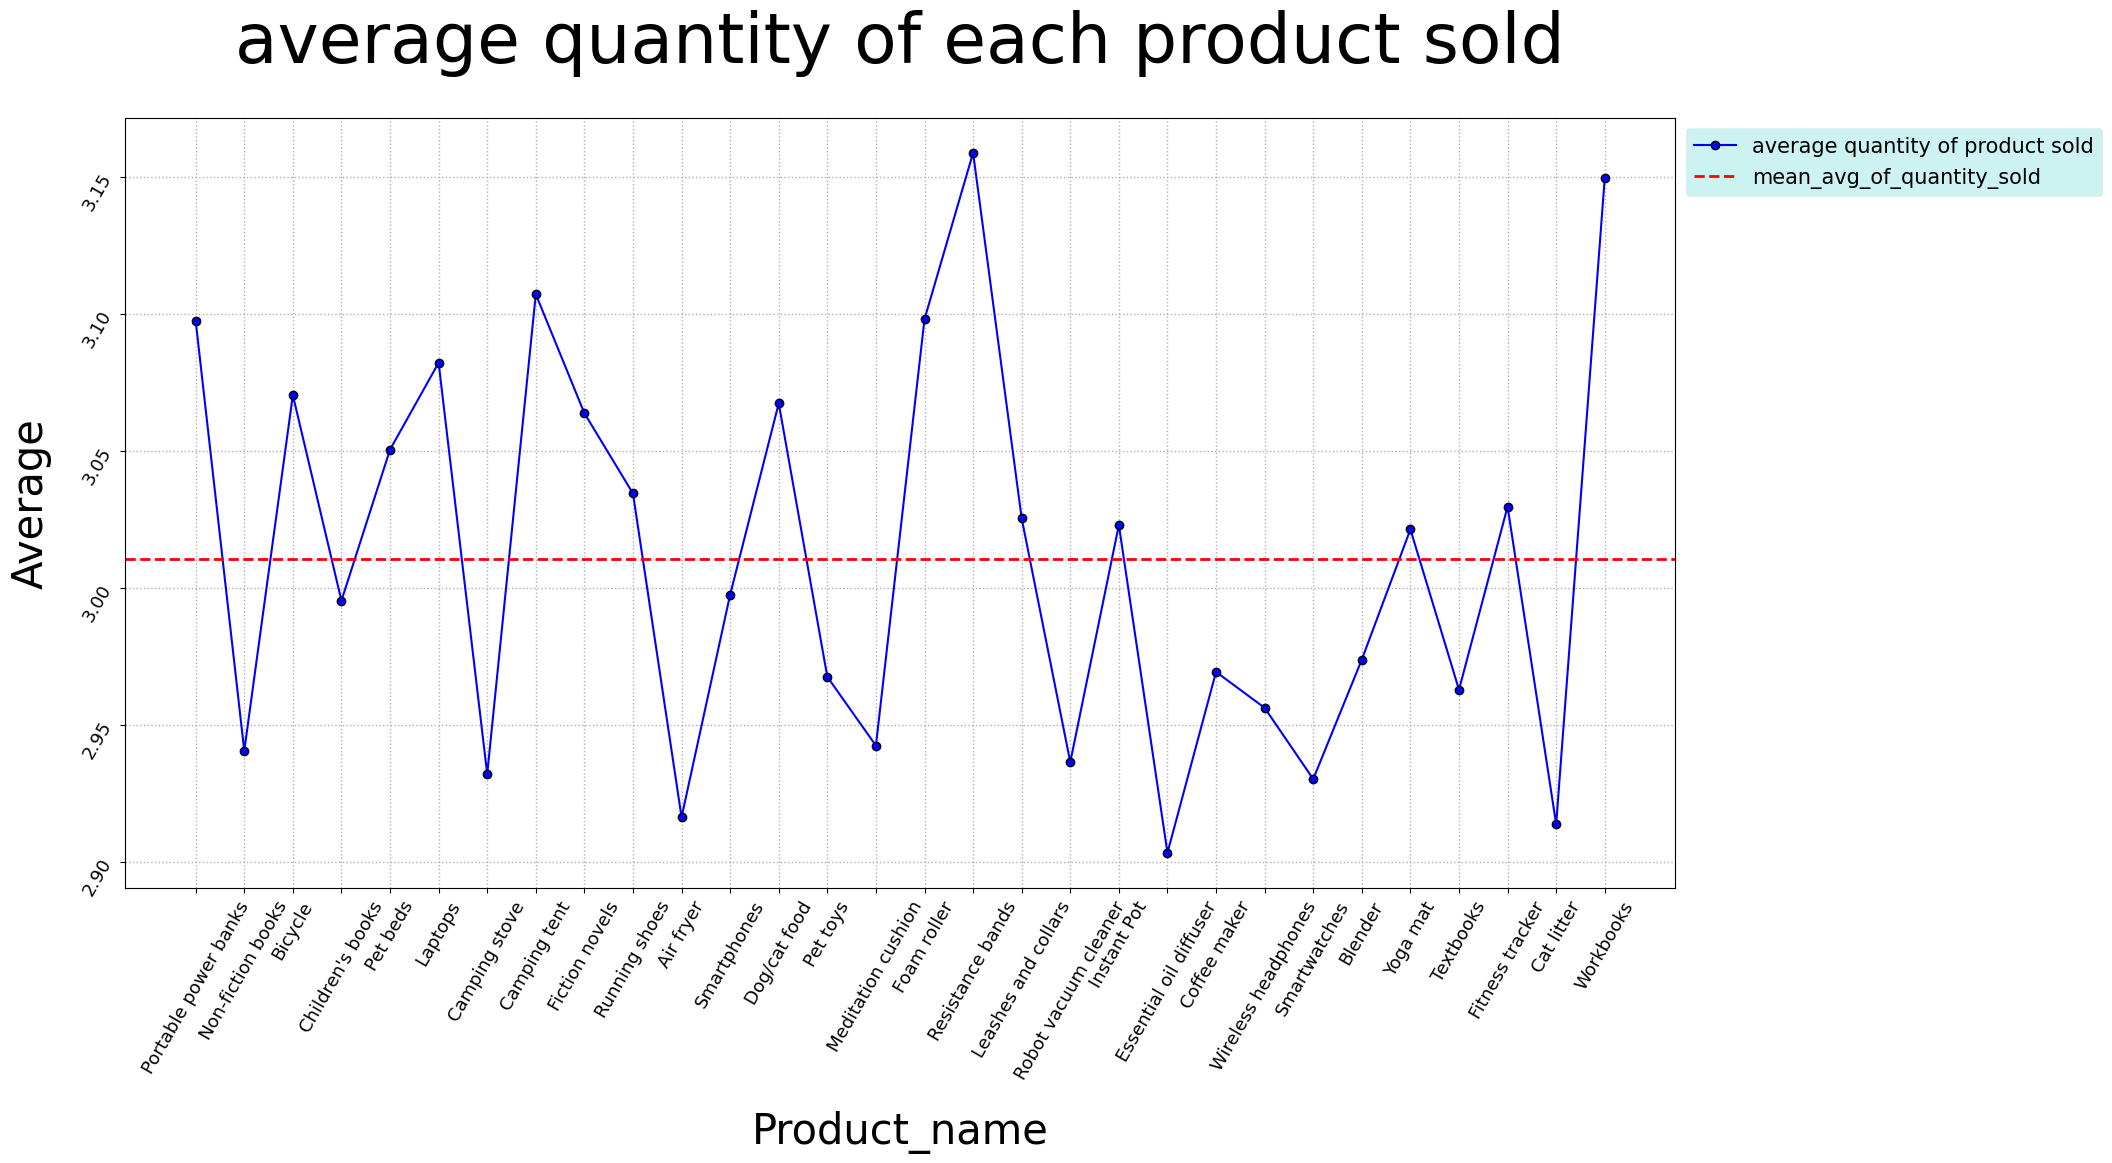

In [244]:
plt.figure(figsize =(20,10))

plt.plot(productname , quantityaverage , marker = "o" , color = "#0000FF" , markeredgecolor = "black" , label = "average quantity of product sold")



plt.axhline(y = mean_avg_of_quantity_sold ,linestyle='--',c='red',lw=2,ms=15 , label = "mean_avg_of_quantity_sold")

plt.title("average quantity of each product sold" , pad = 40 , size = 50)

plt.xlabel("Product_name" , labelpad = 20, size = 30 )
plt.ylabel("Average" , labelpad = 20 , size = 30 )

plt.xticks(size = 13 ,rotation = 60)
plt.yticks(size = 13 ,rotation = 60)

plt.legend(bbox_to_anchor=(1,1),fontsize=15,facecolor='c',framealpha=0.2,fancybox=True)
plt.grid(axis='both',ls='dotted',lw=1)

 # Which supplier has the highest total sales and plot a graph which will indicate top 10 suppliers

In [245]:
query = """ select sub.SupplierID , s.SupplierName as Supplier_name , sum(sd.totalprice) Supplier_total_sales
from salesdata as sd
join subcategories as sub
on sub.SubcatID = sd.SubcatID
join suppliers as s
on  s.SupplierID = sub.SupplierID
group by SupplierID 
order by sum(totalprice) desc
limit 10;
"""

df = read_query(query)

In [246]:
df

,SupplierID,Supplier_name,Supplier_total_sales
0,3040,Dora-Aggarwal,180265340.00
1,3004,Agate-Kalita,141629408.00
2,3002,"Sridhar, Sidhu and Maharaj",124268051.00
3,3003,"Sahota, Khurana and Kumar",119604888.00
4,3074,Date-Mander,117152046.00
5,3078,Verma-Vig,112563616.00
6,3075,"Kapur, Acharya and Wadhwa",98842528.00
7,3073,"Sastry, Bali and Deshmukh",86990482.00
8,3069,Mall Group,82034102.00
9,3080,"Khare, Boase and Gole",80254640.00


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SupplierID            10 non-null     int64 
 1   Supplier_name         10 non-null     object
 2   Supplier_total_sales  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [248]:
suppliername= df["Supplier_name"].values

In [249]:

suppliersales = df["Supplier_total_sales"].astype(float).values

(array([0.00e+00, 2.50e+07, 5.00e+07, 7.50e+07, 1.00e+08, 1.25e+08,
        1.50e+08, 1.75e+08, 2.00e+08]),
 [Text(0, 0.0, '0.00'),
  Text(0, 25000000.0, '0.25'),
  Text(0, 50000000.0, '0.50'),
  Text(0, 75000000.0, '0.75'),
  Text(0, 100000000.0, '1.00'),
  Text(0, 125000000.0, '1.25'),
  Text(0, 150000000.0, '1.50'),
  Text(0, 175000000.0, '1.75'),
  Text(0, 200000000.0, '2.00')])

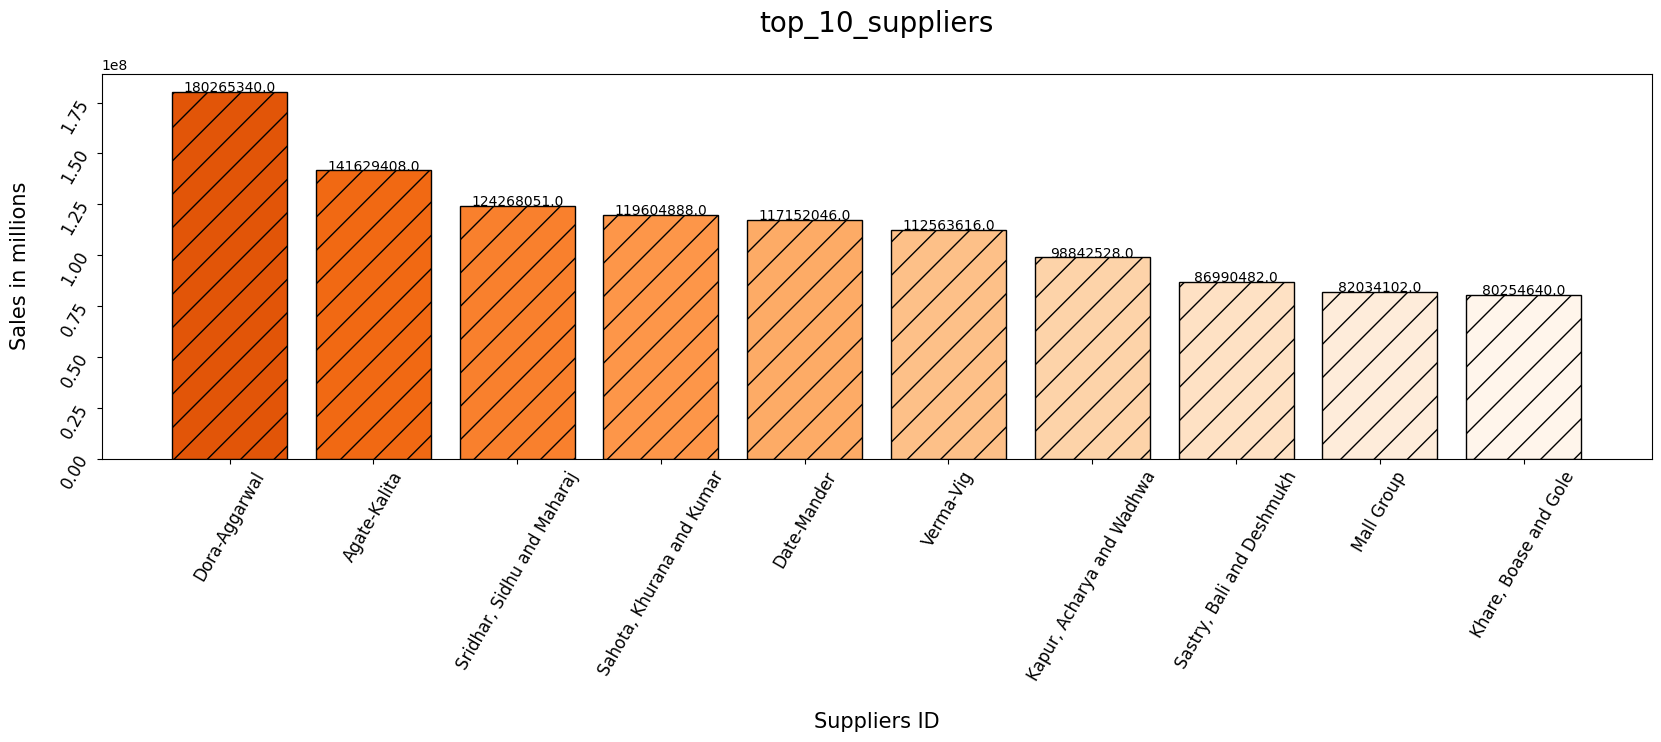

In [250]:
plt.figure(figsize =(20,5))

plt.bar( x = suppliername, height = suppliersales, color = cmap , edgecolor = "black", hatch = "/")
for i in range(len(suppliername)):
    plt.annotate(text = f'{suppliersales[i]}' , xy = (i,suppliersales[i]+5) , horizontalalignment = "center")

plt.title("top_10_suppliers", pad = 30 , size = 20)
plt.xlabel("Suppliers ID" , labelpad = 20 ,size = 15)
plt.ylabel("Sales in millions" , labelpad = 20 ,size = 15)

plt.xticks(rotation = 60 , size = 12)
plt.yticks(rotation = 60 , size = 12)


# What is the total revenue generated from sales in each state

In [251]:
query = """ select cs.state as state_name , sum(sl.totalprice) as total_Revenue_of_state
from salesdata as sl
join customers as cs 
on cs.CustomerID = sl.CustomerID 
group by cs.state
order by total_Revenue_of_state desc;"""

df = read_query(query)

In [252]:
df

,state_name,total_Revenue_of_state
0,Goa,126990041.00
1,Bihar,126103984.00
2,Manipur,122908203.00
3,Himachal Pradesh,102905140.00
4,Karnataka,99671386.00
5,Arunachal Pradesh,97340033.00
6,Tripura,92329290.00
7,Madhya Pradesh,91859171.00
8,Gujarat,91624425.00
9,Chhattisgarh,91546717.00


# plot the graph for top 10 states which generate most revenue :

In [253]:
df  = df.iloc[ : 10 ,: ]

In [254]:
df

,state_name,total_Revenue_of_state
0,Goa,126990041.00
1,Bihar,126103984.00
2,Manipur,122908203.00
3,Himachal Pradesh,102905140.00
4,Karnataka,99671386.00
5,Arunachal Pradesh,97340033.00
6,Tripura,92329290.00
7,Madhya Pradesh,91859171.00
8,Gujarat,91624425.00
9,Chhattisgarh,91546717.00


In [255]:
state = df["state_name"].values
revenue = df["total_Revenue_of_state"].astype(float).values

In [256]:
cmap_values = np.linspace(0.3,1,10)
cmap = plt.cm.PuBuGn(cmap_values)

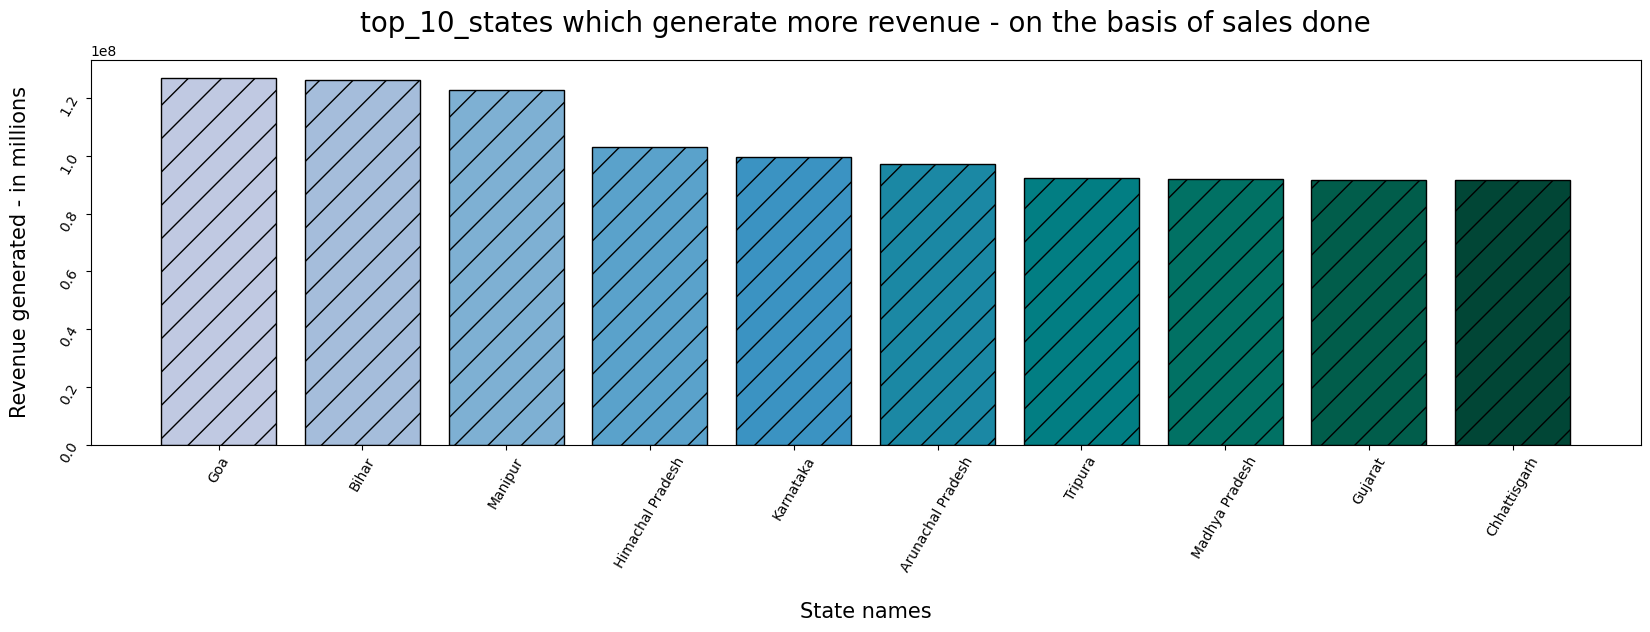

In [257]:
plt.figure(figsize =(20,5))

plt.bar(x = state , height = revenue, color = cmap , edgecolor = "black" , hatch = "/")



plt.title("top_10_states which generate more revenue - on the basis of sales done", pad = 20 , size = 20 )
plt.xlabel("State names" , labelpad = 20, size = 15 )
plt.ylabel("Revenue generated - in millions", labelpad = 20, size = 15 )

plt.xticks(size =10 ,rotation = 60)
plt.yticks(size = 10 ,rotation = 60)

plt.show()

# How many sales were made by each customer?

In [258]:
query = """ select sd.CustomerID , concat(c.firstname , " ",c.lastname) as customer_name , sum(sd.totalprice) as customer_expenditure
from customers as c
join salesdata as sd
on c.CustomerID = sd.CustomerID
group by sd.CustomerID
order by customer_expenditure desc;"""

df = read_query(query)

In [259]:
df

,CustomerID,customer_name,customer_expenditure
0,C-2023-100-13,Veer Loyal,13016064.00
1,C-2023-100-94,Priyansh Yadav,12629337.00
2,C-2023-100-57,Riya Saraf,12599608.00
3,C-2023-100-58,Vanya Ranganathan,12455437.00
4,C-2023-100-88,Dhruv Apte,12280916.00
...,...,...,...
195,C-2023-100-85,Faiyaz Jaggi,6590175.00
196,C-2023-100-24,Hunar Srinivasan,6504654.00
197,C-2023-100-59,Biju Mahal,6243957.00
198,C-2023-100-80,Reyansh Mahajan,5950321.00


# tol 10 customers with most money spent on sales

In [260]:
df = df.iloc[ :10 , : ]

In [261]:
df

,CustomerID,customer_name,customer_expenditure
0,C-2023-100-13,Veer Loyal,13016064.00
1,C-2023-100-94,Priyansh Yadav,12629337.00
2,C-2023-100-57,Riya Saraf,12599608.00
3,C-2023-100-58,Vanya Ranganathan,12455437.00
4,C-2023-100-88,Dhruv Apte,12280916.00
5,C-2023-100-165,Tarini Khare,12130487.00
6,C-2023-100-197,Yuvraj Lata,11868602.00
7,C-2023-100-199,Rhea Chander,11704275.00
8,C-2023-100-196,Darshit Setty,11520699.00
9,C-2023-100-75,Prerak Dyal,11442527.00


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            10 non-null     object
 1   customer_name         10 non-null     object
 2   customer_expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [263]:
customername = df["customer_name"].values
customersale = df["customer_expenditure"].astype(float).values

In [264]:
cmap_values = np.linspace(0.3,1,10)
cmap = plt.cm.RdYlBu_r(cmap_values)

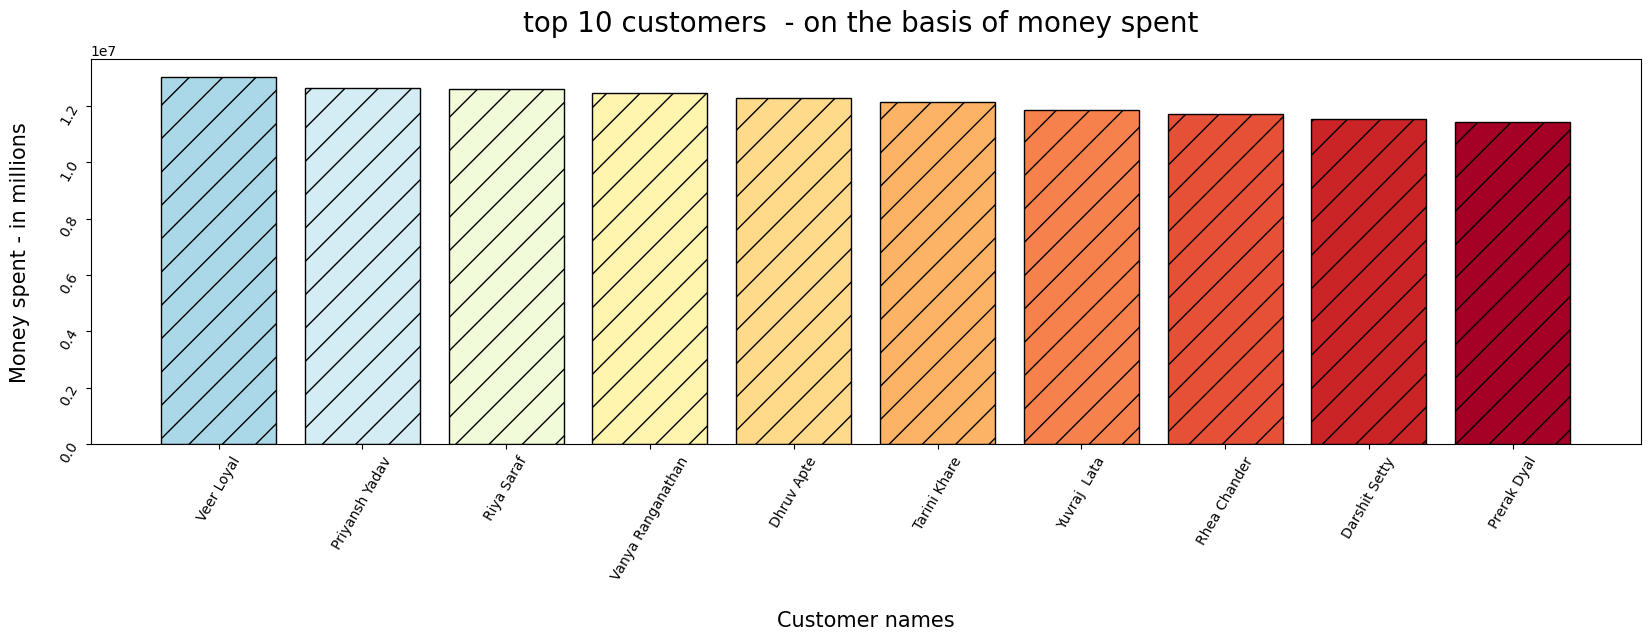

In [265]:
plt.figure(figsize =(20,5))

plt.bar(x = customername , height = customersale, color = cmap , edgecolor = "black" , hatch = "/")



plt.title("top 10 customers  - on the basis of money spent ", pad = 20 , size = 20 )
plt.xlabel("Customer names" , labelpad = 20, size = 15 )
plt.ylabel("Money spent - in millions", labelpad = 20, size = 15 )

plt.xticks(size =10 ,rotation = 60)
plt.yticks(size = 10 ,rotation = 60)

plt.show()

# What is the total salary expenditure on employees in each department?

In [266]:
query = """ select Department , sum(salary) as total_salaries
from employees
group by department;"""

df = read_query(query)

In [267]:
df

,Department,total_salaries
0,Marketing,469413.37
1,Legal,577095.43
2,Accounts,445848.85
3,Logistics,365835.92
4,Sales,325662.92
5,ML Engineer,652081.28
6,HR Admin,482618.09
7,Engineering,393266.08
8,Analyst,732044.77
9,IT,351627.51


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Department      10 non-null     object
 1   total_salaries  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [269]:
department = df["Department"].values
salaries = df["total_salaries"].astype(float).values

In [270]:
cmap_values = np.linspace(0.3,1,10)
cmap = plt.cm.PuBuGn(cmap_values)

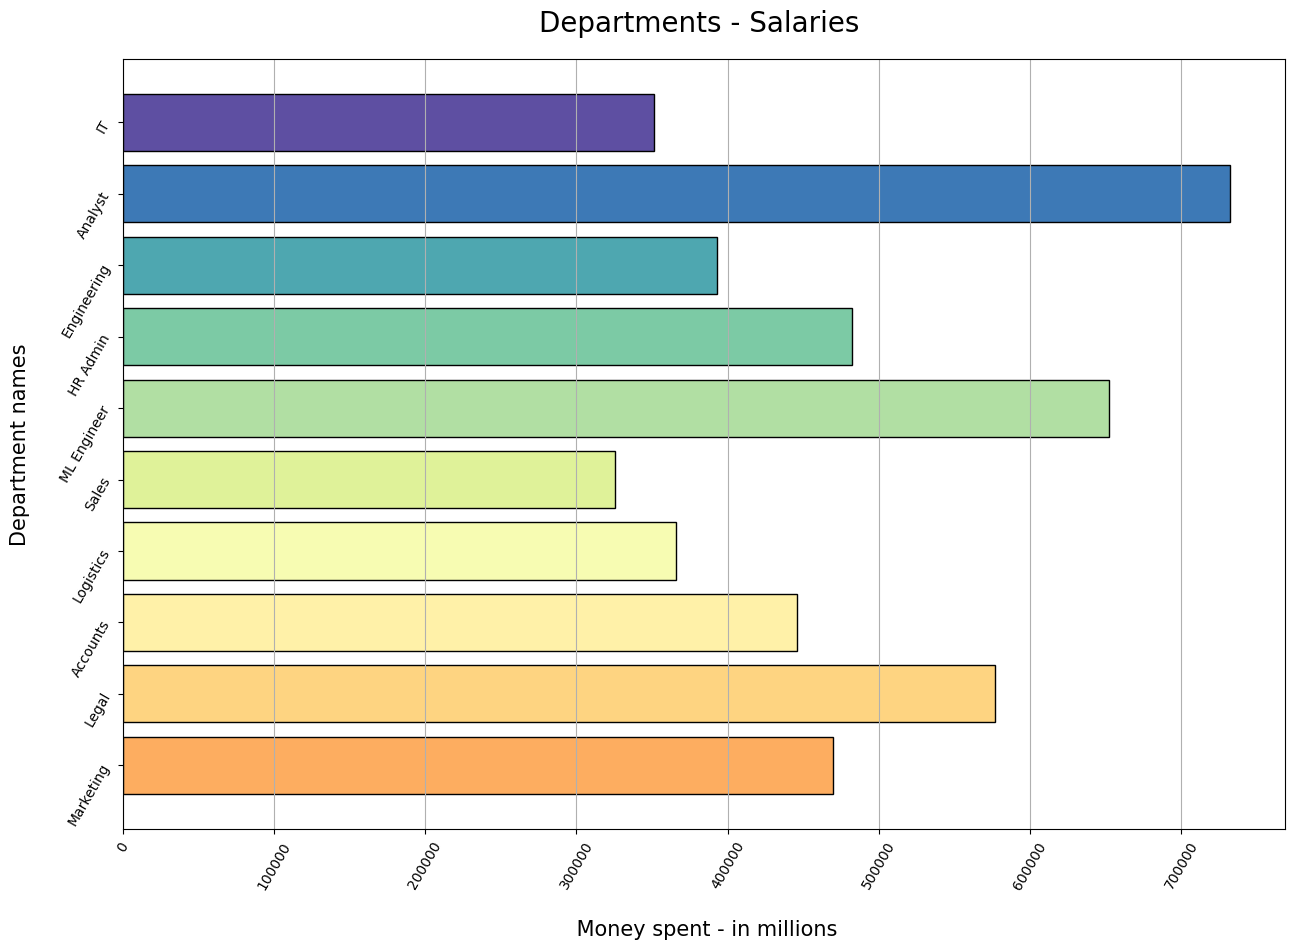

In [271]:
plt.figure(figsize =(15,10))

plt.barh(y = department , width = salaries, color = cm , edgecolor = "black")


plt.title("Departments - Salaries ", pad = 20 , size = 20 )
plt.xlabel(" Money spent - in millions" , labelpad = 20, size = 15 )
plt.ylabel("Department names", labelpad = 20, size = 15 )

plt.xticks(size =10 ,rotation = 60)
plt.yticks(size = 10 ,rotation = 60)

plt.grid(axis = "x")
plt.show()

# Which subcategory has the highest  unit price?

In [272]:
query = """select SubcatName , sum(unitprice) as unit_price
 from subcategories 
 group by Subcatname
 order by unit_price desc;
"""

df = read_query(query)

In [273]:
df.head()

,SubcatName,unit_price
0,Pet beds,94029.00
1,Laptops,88216.00
2,Air fryer,85039.00
3,Fiction novels,79862.00
4,Camping stove,79387.00


# the total revenue generated from sales in each category?

In [274]:
query = """ select sub.CategoryID , c.CategoryName  as Category_name, sum(sd.totalprice) as total_sales
from salesdata as sd
join subcategories as sub
on sub.SubcatID = sd.SubcatID
join categories as c
on  c.CategoryID = sub.CategoryID
group by sub.CategoryID
order by total_sales desc;""" 

df = read_query(query)

In [275]:
df

,CategoryID,Category_name,total_sales
0,500105,Pet Supplies and Accessories,361848986.00
1,500103,Health and Wellness Products,324761329.00
2,500100,Electronics and Gadgets,319374417.00
3,500104,Books and Educational Materials,282897933.00
4,500101,Home and Kitchen Appliances,269316684.00
5,500102,Outdoor and Sports Equipment,231074739.00


In [276]:
categoryname = df["Category_name"].values
categorysales = df["total_sales"].astype(float).values

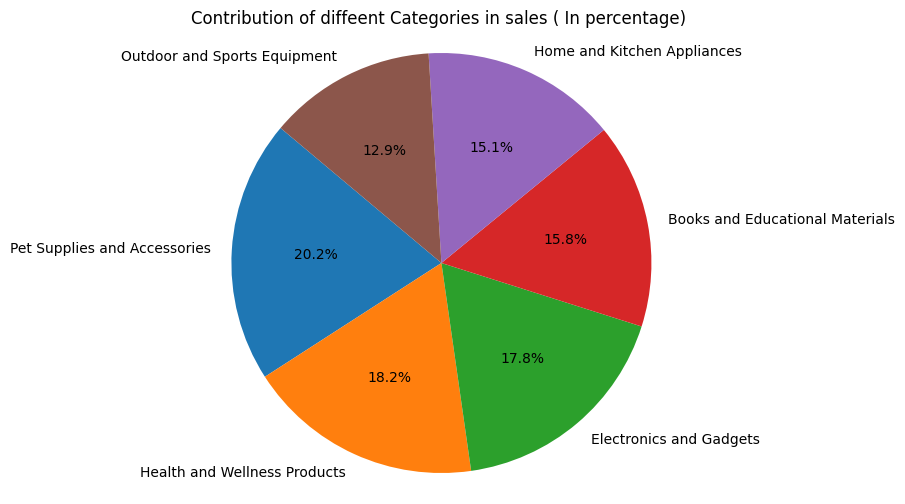

In [277]:
plt.figure(figsize=(10, 6))

plt.pie(categorysales, labels=categoryname, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of diffeent Categories in sales ( In percentage) ')

plt.axis('equal') 
plt.show()